#IMDB Movie review dataset sentiment analysis

###Research Question: Can the model detect the percentage of negativity and postivity in the movie review sample input?

###Installing the required packages

In [1]:
!pip install transformers[torch]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 4.5 MB/s eta 0:00:00


In [2]:
!pip install accelerate -U

In [3]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00


The model utlized is from the link below:

https://huggingface.co/JiaqiLee/imdb-finetuned-bert-base-uncased/tree/main





In [4]:
from datasets import load_dataset, load_metric
data = load_dataset("imdb")
data

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [5]:
train_data = data["train"]
train_data

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [6]:
data['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

Creating a dataframe from the dataset

In [9]:
df = train_data.to_pandas()
df.head()

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


In [10]:
print(data["train"][:2].get("text"))

['I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, e

# Data Preprocessing

#Box plot

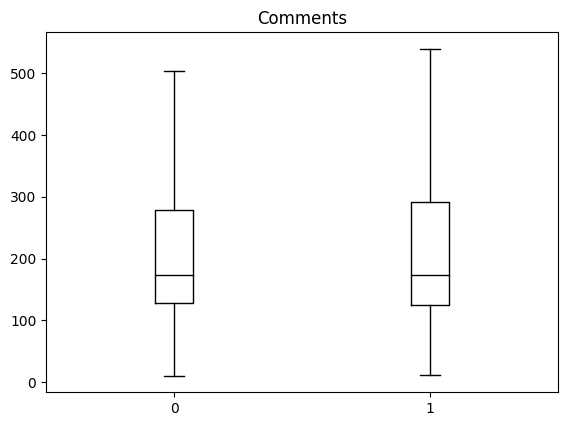

In [11]:
import matplotlib.pyplot as plt

df["Comments"] = df["text"].str.split().apply(len)
df.boxplot("Comments", by="label", grid = False, showfliers = False,
          color = "Black")
plt.suptitle("")
plt.xlabel("")
plt.show()

#Tokenization of data

In [16]:
import transformers

tokenizer = transformers.AutoTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [17]:
def tokenize(batch):
    return tokenizer(batch["text"], truncation=True)
# How to work tokenizer on our some data:
print(tokenize(data["train"][:2]))
data_encoded = data.map(tokenize, batched=True,
                               batch_size=None)

{'input_ids': [[101, 1045, 12524, 1045, 2572, 8025, 1011, 3756, 2013, 2026, 2678, 3573, 2138, 1997, 2035, 1996, 6704, 2008, 5129, 2009, 2043, 2009, 2001, 2034, 2207, 1999, 3476, 1012, 1045, 2036, 2657, 2008, 2012, 2034, 2009, 2001, 8243, 2011, 1057, 1012, 1055, 1012, 8205, 2065, 2009, 2412, 2699, 2000, 4607, 2023, 2406, 1010, 3568, 2108, 1037, 5470, 1997, 3152, 2641, 1000, 6801, 1000, 1045, 2428, 2018, 2000, 2156, 2023, 2005, 2870, 1012, 1026, 7987, 1013, 1028, 1026, 7987, 1013, 1028, 1996, 5436, 2003, 8857, 2105, 1037, 2402, 4467, 3689, 3076, 2315, 14229, 2040, 4122, 2000, 4553, 2673, 2016, 2064, 2055, 2166, 1012, 1999, 3327, 2016, 4122, 2000, 3579, 2014, 3086, 2015, 2000, 2437, 2070, 4066, 1997, 4516, 2006, 2054, 1996, 2779, 25430, 14728, 2245, 2055, 3056, 2576, 3314, 2107, 2004, 1996, 5148, 2162, 1998, 2679, 3314, 1999, 1996, 2142, 2163, 1012, 1999, 2090, 4851, 8801, 1998, 6623, 7939, 4697, 3619, 1997, 8947, 2055, 2037, 10740, 2006, 4331, 1010, 2016, 2038, 3348, 2007, 2014, 3689, 38

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Padding the data

In [24]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer = tokenizer)

#Data Preprocessing

In [18]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name = "distilbert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [19]:
!pip install -q evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.0 MB/s eta 0:00:00


In [20]:
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions,
                           references = labels)

In [21]:
from huggingface_hub import notebook_login
notebook_login()

In [22]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="distilbert-imdb",
    num_train_epochs = 5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy = "epoch",
    load_best_model_at_end = True,
    push_to_hub = True,
    report_to = "none"
)

In [25]:
from transformers import Trainer
trainer = Trainer(
    model = model,
    args = training_args,
    compute_metrics = compute_metrics,
    train_dataset = data["train"],
    eval_dataset = data["test"],
    tokenizer = tokenizer,
    data_collator=data_collator
)


In [26]:
from transformers import DataCollatorForLanguageModeling
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)


In [27]:
trainer.train()


You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


ValueError: ignored

#Using Pipeline to train data

In [35]:
from transformers import pipeline
model_id = "JiaqiLee/imdb-finetuned-bert-base-uncased"
classifier = pipeline("text-classification", model= model_id)


config.json:   0%|          | 0.00/795 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

#Training data

In [36]:
custom_text="I liked a movie I watched recently. It was really good but I did not like the direction of the movie"


In [37]:
from transformers import BertForSequenceClassification, BertTokenizer, TextClassificationPipeline
model_path = "JiaqiLee/imdb-finetuned-bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path, num_labels=2)
pipeline = TextClassificationPipeline(model=model, tokenizer=tokenizer)
print(pipeline(custom_text))


[{'label': 'positive', 'score': 0.8255593776702881}]


###We tried to check if the model can recognize the percentage of negativity and positivity on a bar plot.





#Sample 1

In [38]:
from transformers import pipeline

model_id = "JiaqiLee/imdb-finetuned-bert-base-uncased"
classifier = pipeline("text-classification", model= model_id)

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
sample_review_one="I liked a movie I watched recently. It was really good however I felt it could have been a better screenplay to show more emotions in the movie"


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


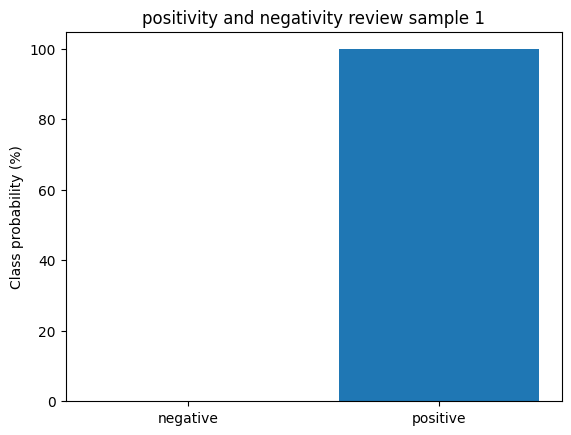

In [55]:
preds=classifier(sample_review_one, return_all_scores = True)
preds_df = pd.DataFrame(preds[0])
labels = ["negative", "positive"]
plt.bar(labels, 100*preds_df["score"])
plt.title("positivity and negativity review sample 1")
plt.ylabel("Class probability (%)")
plt.show()

#Sample 2

In [45]:
sample_review_two="The Menu is a film with mixed emotions. It boasts strong performances and a unique premise, but ultimately fails to reach its full potential due to a somewhat uneven narration and a rushed climax. Nevertheless, it was visually stunning and thought-provoking film that is worth watching for fans of dark comedies and thrillers."


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


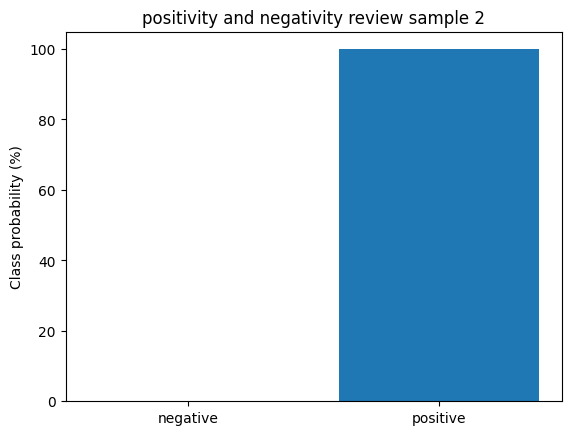

In [56]:
preds=classifier(sample_review_two, return_all_scores = True)
preds_df = pd.DataFrame(preds[0])
labels = ["negative", "positive"]
plt.bar(labels, 100*preds_df["score"])
plt.title("positivity and negativity review sample 2")
plt.ylabel("Class probability (%)")
plt.show()

#Sample 3

In [47]:
sample_review_three="I had the worst experience watching this movie.however I liked the music in the movie. I liked how they tried to potray the villain as a strong character"


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


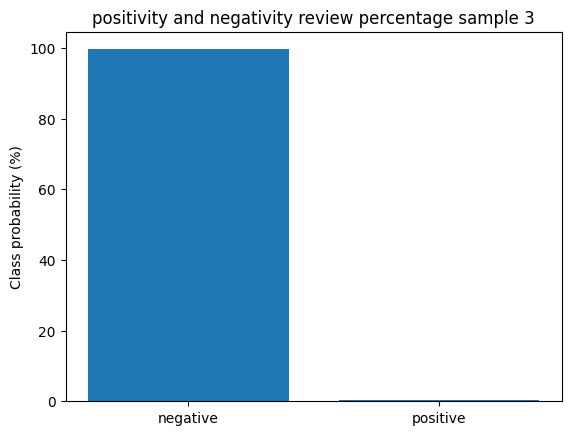

In [57]:
preds=classifier(sample_review_three, return_all_scores = True)
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100*preds_df["score"])
plt.title("positivity and negativity review percentage sample D3")
plt.ylabel("Class probability (%)")
plt.show()

#Conclusion
The model was useful to show if a comment was either postive or nagetive for a movie review from the IMDB dataset. However, it could not recognize the accurate percentage of negativity and positivity in the review given. If possible in future, We would want to improve this model to show the percentage of negativity and positivity in a movie review.